Dataset Columns:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan 2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan 2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan 2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan 2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

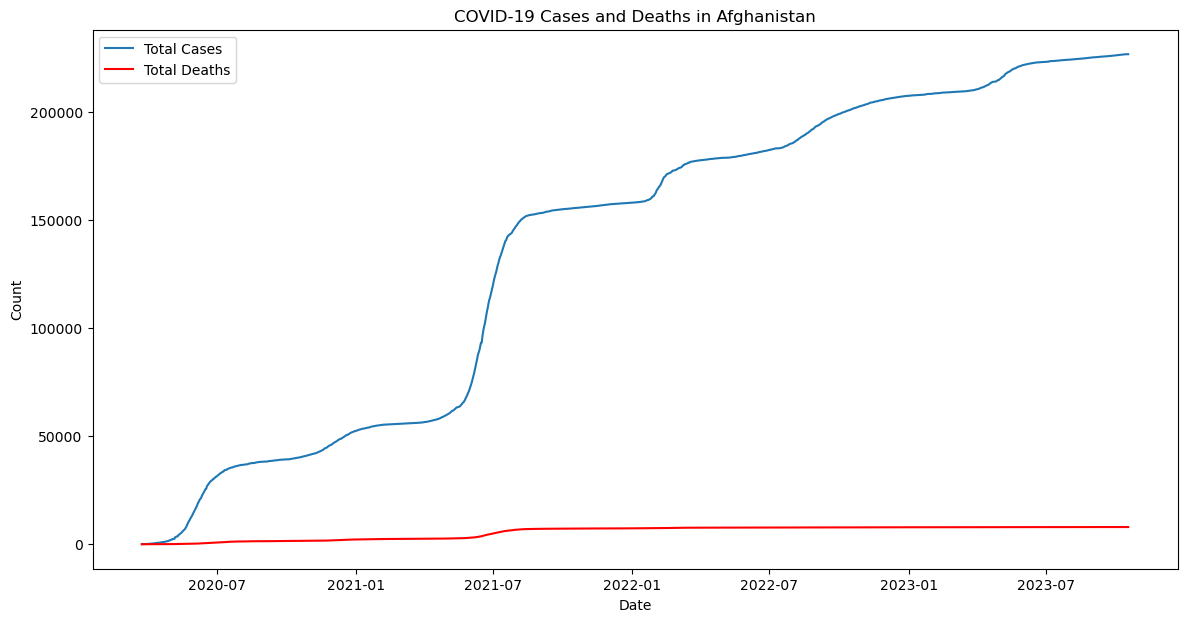

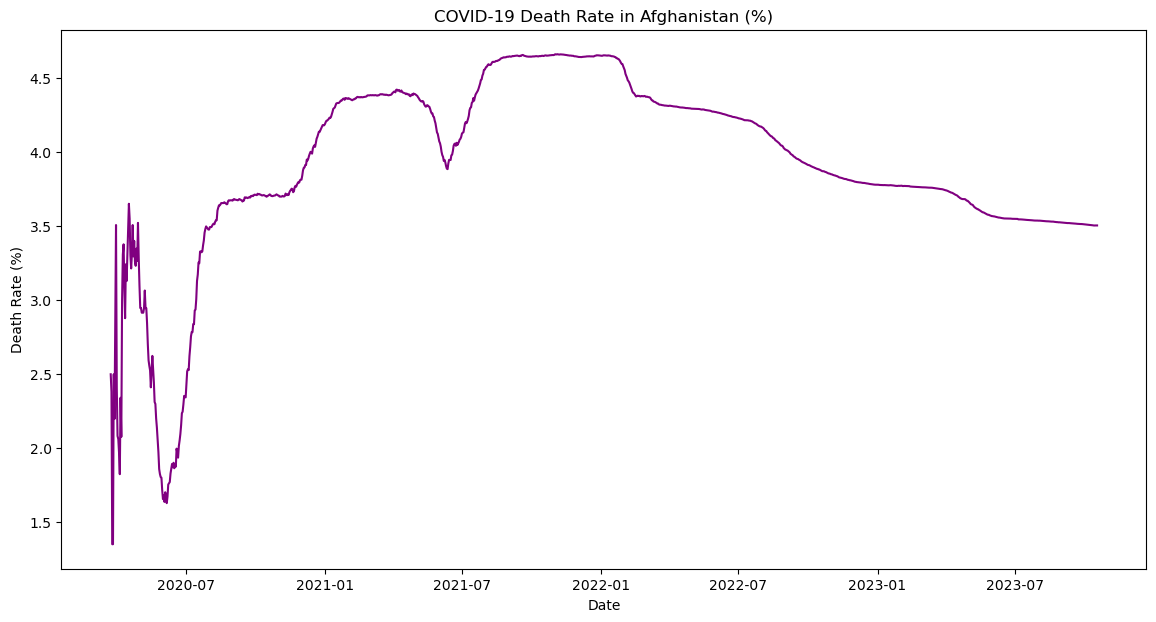

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os  # Add this for directory handling

# Create output directories if they don't exist
os.makedirs('../outputs/plots', exist_ok=True)  # Fixes directory creation

# Load the dataset
df = pd.read_csv('../data/owid-covid-data.csv', parse_dates=['date'])

# --- Data Exploration ---
print("Dataset Columns:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 rows:")
display(df.head())

# --- Data Cleaning ---
# Filter countries (example: Afghanistan)
df_afg = df[df['location'] == 'Afghanistan'].copy()

# Drop rows with missing critical data
df_afg = df_afg.dropna(subset=['total_cases', 'total_deaths'])

# Forward-fill vaccinations (using modern syntax)
df_afg['total_vaccinations'] = df_afg['total_vaccinations'].ffill()

# --- EDA: Total Cases & Deaths ---
plt.figure(figsize=(14, 7))
plt.plot(df_afg['date'], df_afg['total_cases'], label='Total Cases')
plt.plot(df_afg['date'], df_afg['total_deaths'], label='Total Deaths', color='red')
plt.title('COVID-19 Cases and Deaths in Afghanistan')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.savefig('../outputs/plots/cases_deaths.png')
plt.show()

# --- Daily New Cases ---
plt.figure(figsize=(14, 7))
plt.bar(df_afg['date'], df_afg['new_cases'], color='orange')
plt.title('Daily New Cases in Afghanistan')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.savefig('../outputs/plots/new_cases.png')
plt.show()

# --- Death Rate Analysis ---
df_afg['death_rate'] = (df_afg['total_deaths'] / df_afg['total_cases']) * 100
plt.figure(figsize=(14, 7))
plt.plot(df_afg['date'], df_afg['death_rate'], color='purple')
plt.title('COVID-19 Death Rate in Afghanistan (%)')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.savefig('../outputs/plots/death_rate.png')
plt.show()

# --- Vaccination Progress ---
if 'total_vaccinations' in df_afg.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(df_afg['date'], df_afg['total_vaccinations'], color='green')
    plt.title('Total Vaccinations in Afghanistan')
    plt.xlabel('Date')
    plt.ylabel('Vaccinations')
    plt.savefig('../outputs/plots/vaccinations.png')
    plt.show()

# --- Choropleth Map (Global Cases) ---
# Get latest data for all countries
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date]

# Plot
fig = px.choropleth(
    df_latest,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    projection="natural earth",
    title=f'Global COVID-19 Cases as of {latest_date.strftime("%Y-%m-%d")}',
    color_continuous_scale='Viridis'
)
fig.show()